In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,MinMaxScaler,OneHotEncoder


In [259]:
train_ds=pd.read_csv('./train.csv')
test_ds=pd.read_csv('./test.csv')

In [260]:
train_col=train_ds.columns
test_col=train_ds.columns

train_ds.info(),test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110

(None, None)

In [261]:
numeric_cols=train_ds.select_dtypes(include=['number']).columns
categorical_cols=train_ds.select_dtypes(include=['object','category']).columns

for i in numeric_cols:
    print(train_ds[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0


In [262]:
categorical_cols,numeric_cols

(Index(['Surname', 'Geography', 'Gender'], dtype='object'),
 Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Exited'],
       dtype='object'))

In [263]:
for i in categorical_cols:
    print(train_ds[i].isna().sum())

0
0
0


In [264]:
for i in categorical_cols:
    print(train_ds[i].value_counts())

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
Gender
Male      93150
Female    71884
Name: count, dtype: int64


### **this dataset has not nan value**

In [265]:
for i in categorical_cols:
    length_cat=len(train_ds[i].unique())
    if length_cat<20:
        print(i,train_ds[i].unique())
    else:
        print(i,length_cat,"types of categories")

Surname 2797 types of categories
Geography ['France' 'Spain' 'Germany']
Gender ['Male' 'Female']


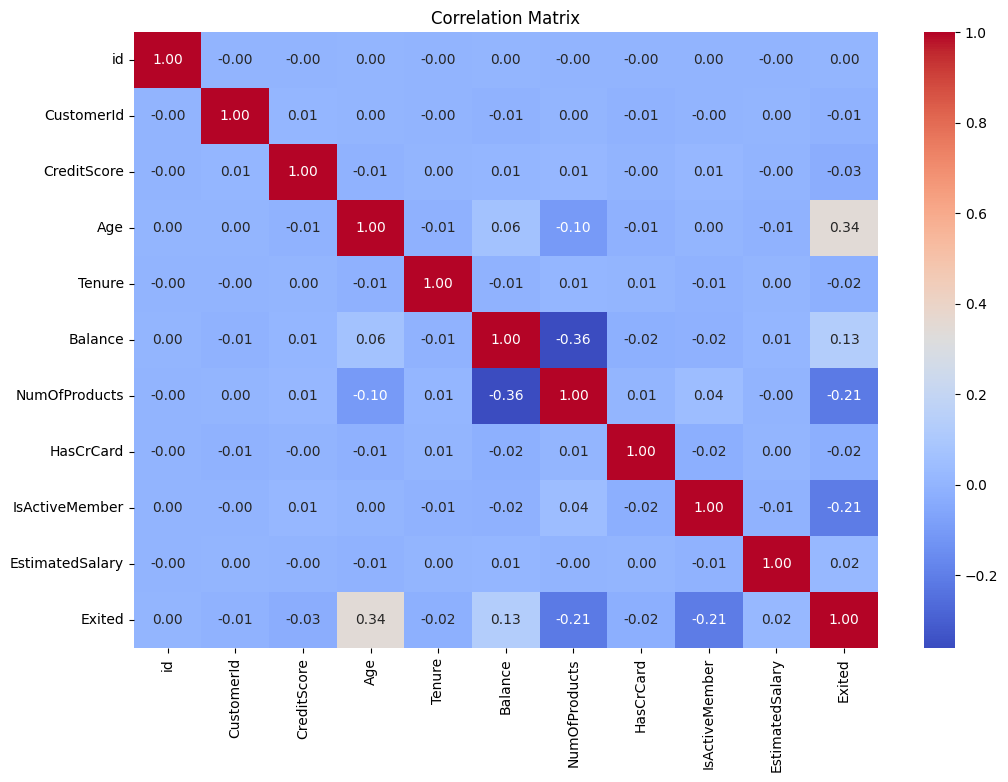

In [266]:
data_subset = train_ds[numeric_cols]

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

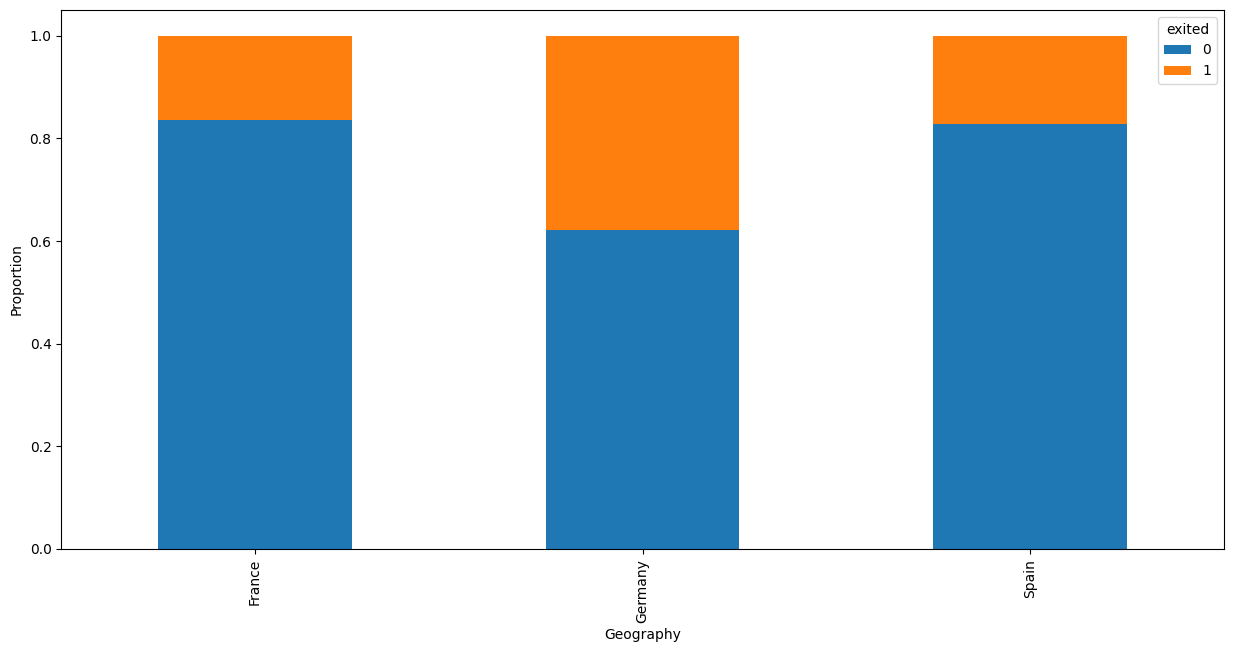

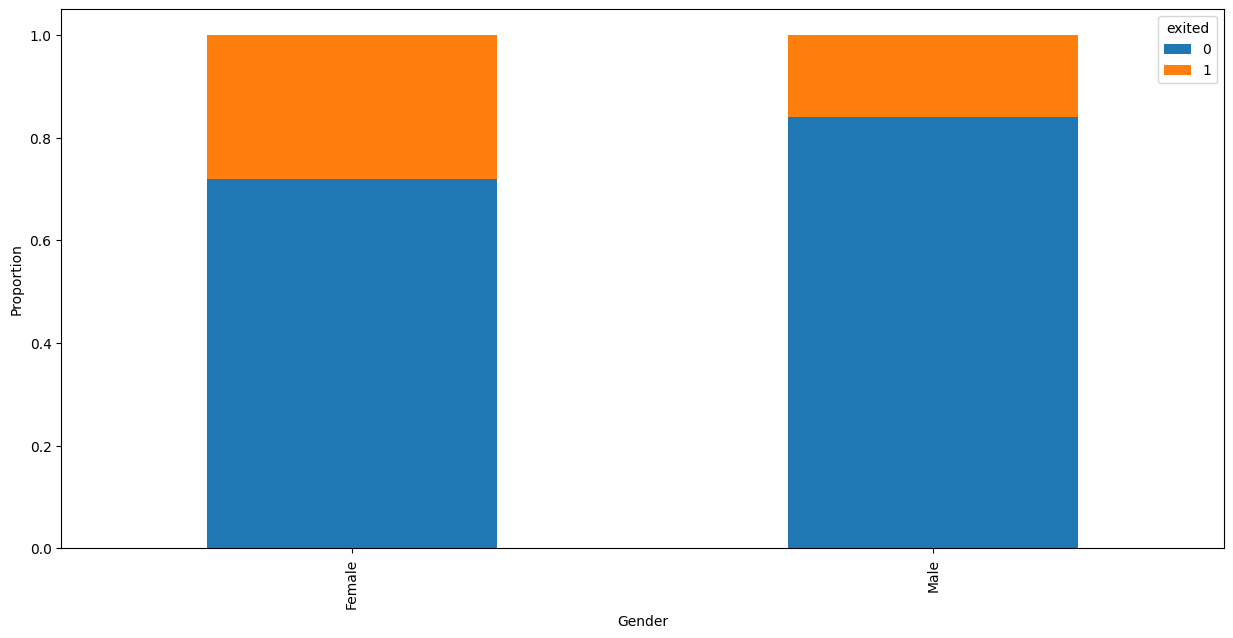

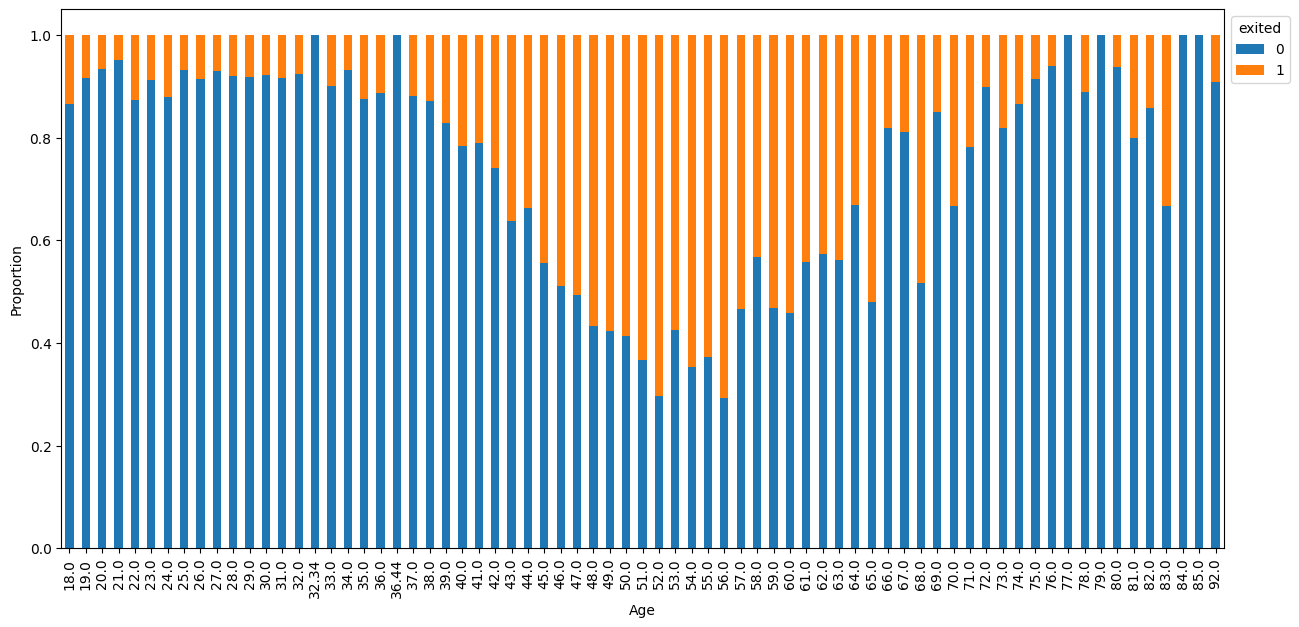

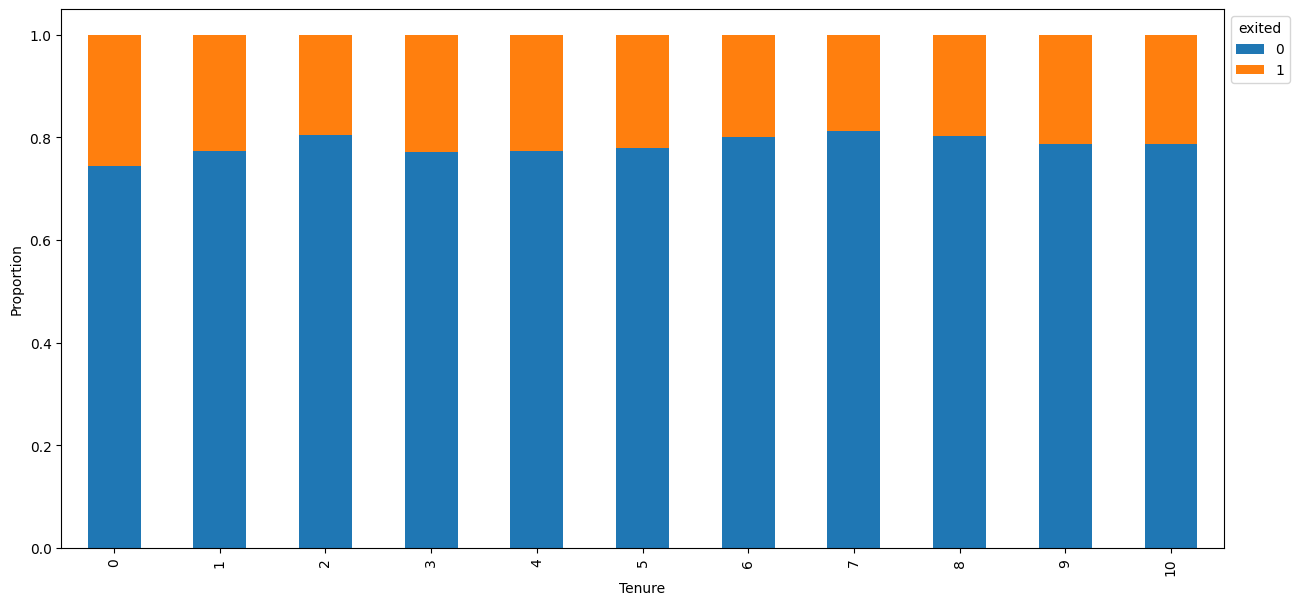

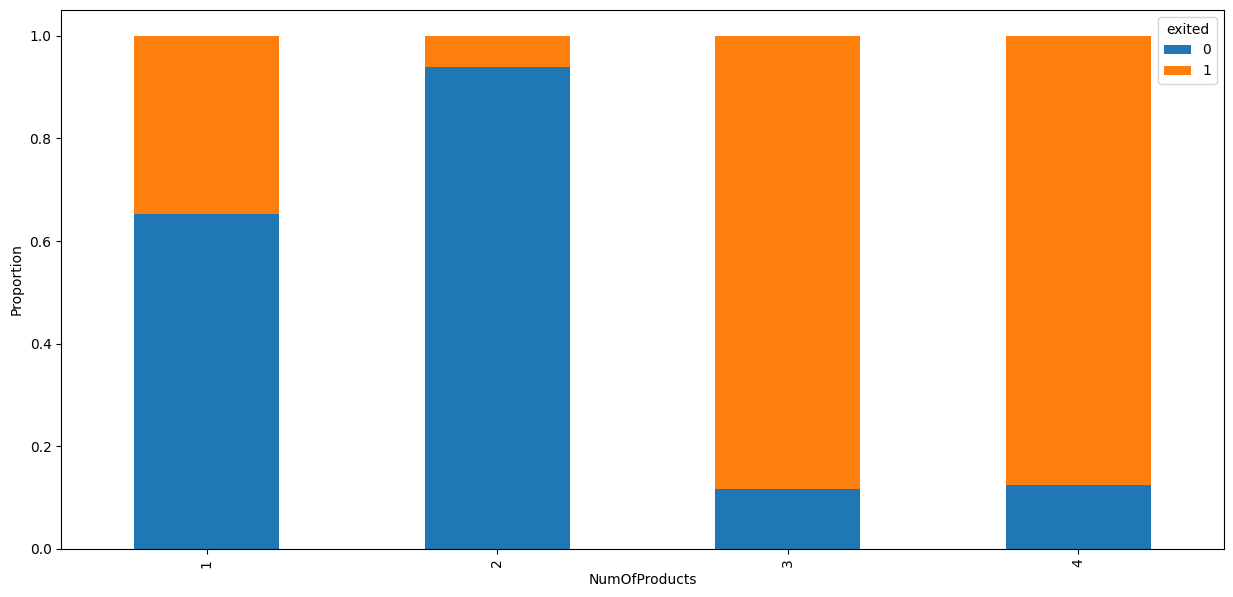

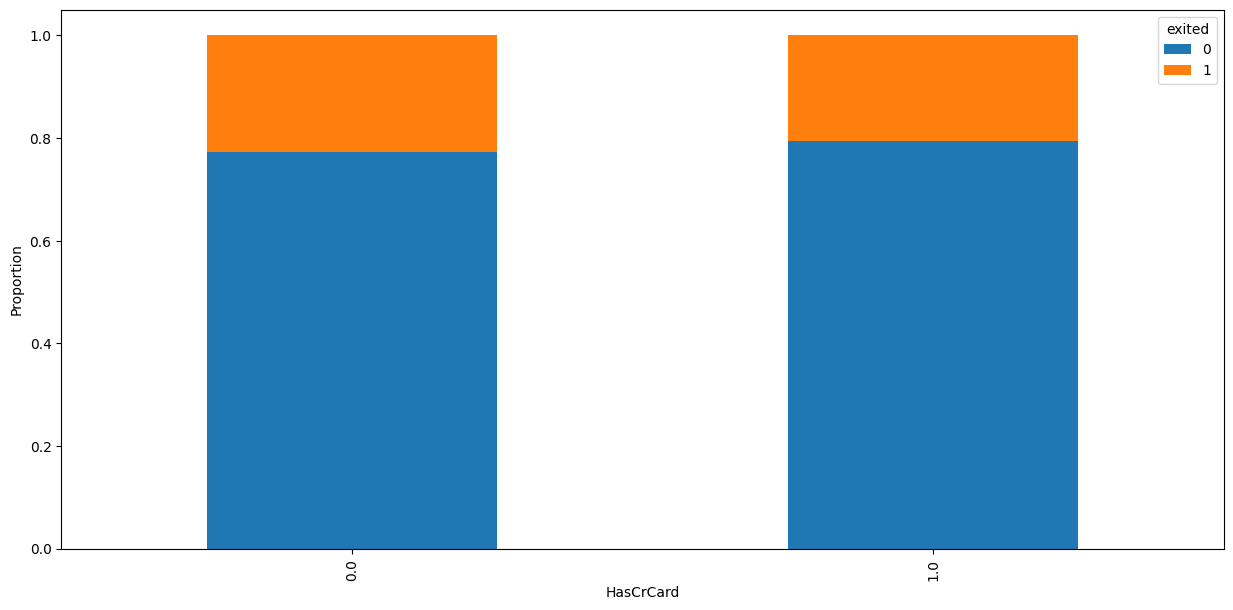

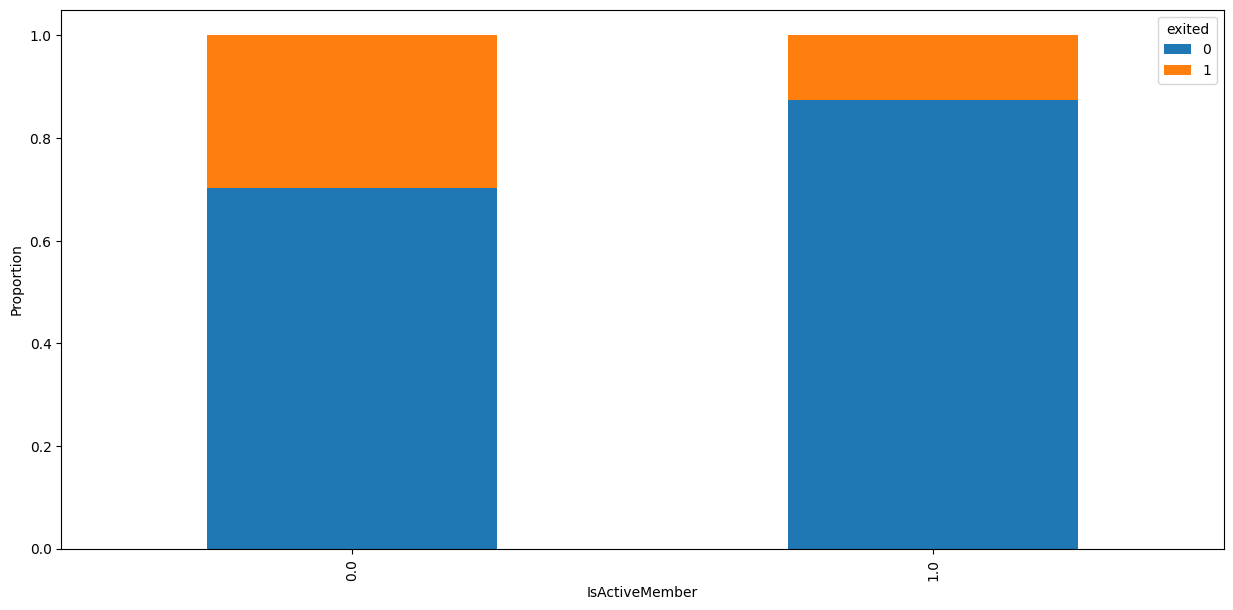

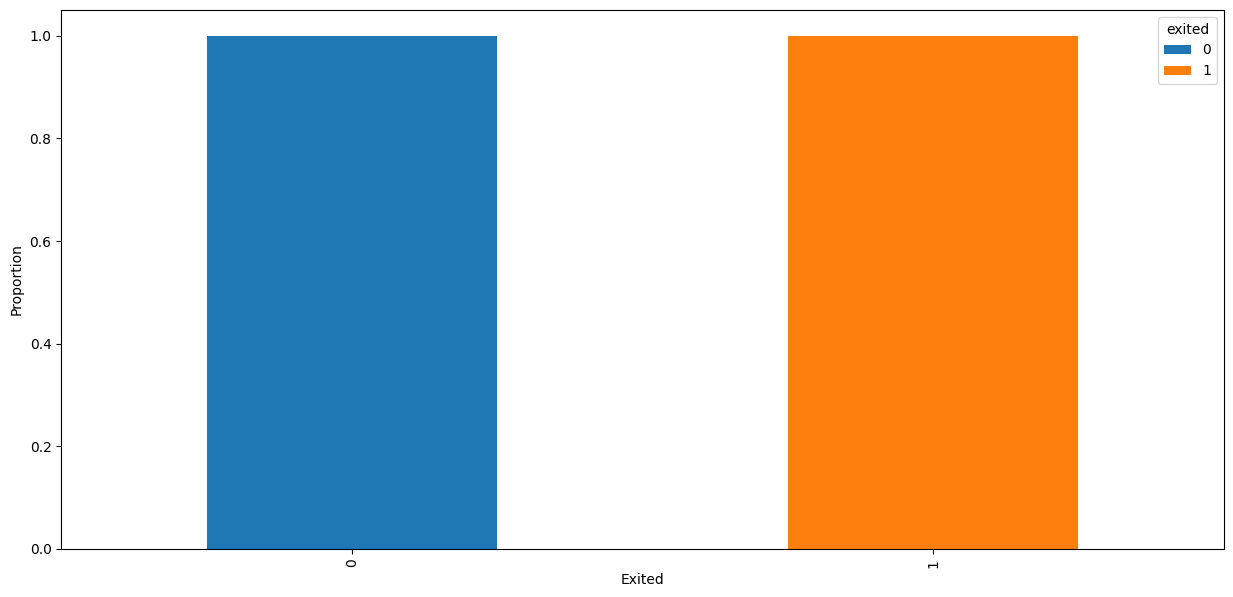

In [267]:
def visualize(string1):
    col=string1
    ct= train_ds[col].value_counts(dropna=False).sort_index()
    grouped_data = train_ds.groupby([string1, "Exited"]).size().unstack(fill_value=0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(15, 7))
    proportions.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel(string1)
    plt.ylabel('Proportion')
    plt.legend(title="exited", bbox_to_anchor=(1, 1))
    plt.show()

for i in train_col:
    if(len(train_ds[i].unique())<100):
        visualize(i)

## **Train Test Split**

In [268]:
train_data=train_ds.drop(columns=['id','CustomerId','Surname'],axis=1)
test_data=test_ds.drop(columns=['id','CustomerId','Surname'],axis=1)

target=train_ds.drop(columns=['Exited'],axis=1)

In [269]:
X_train, X_test, y_train, y_test=train_test_split(train_data, target, test_size=0.2, random_state=42)

In [270]:

def encode_data(value):
    if value <=38 or value >= 72:
        return 1
    elif 38<value <=44:
        return 2
    elif 63 < value <72:
        return 2
    elif 44< value <=63:
        return 3
    else:
        return 0
X_train['Age'] = X_train['Age'].apply(encode_data)

mapping = {"France": 1, "Spain": 1, "Germany": 2}
# Map the values of the 'geography' column using the defined mapping
X_train['Geography'] = X_train['Geography'].map(mapping)  



In [271]:
def encode_NumOfProducts(value):
    if value<=2:
        return 1
    elif value>2:
        return 2
X_train['NumOfProducts'] = X_train['NumOfProducts'].apply(encode_NumOfProducts)

def encode_NumOfProducts(value):
    if value==0:
        return 2
    elif value==1:
        return 1
X_train['IsActiveMember'] = X_train['IsActiveMember'].apply(encode_NumOfProducts)


In [272]:
mapping = {"Female": 2, "Male":1}
# Map the values of the 'geography' column using the defined mapping
X_train['Gender'] = X_train['Gender'].map(mapping)  


In [273]:
X_train_cols=X_train.columns
X_train_cols

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

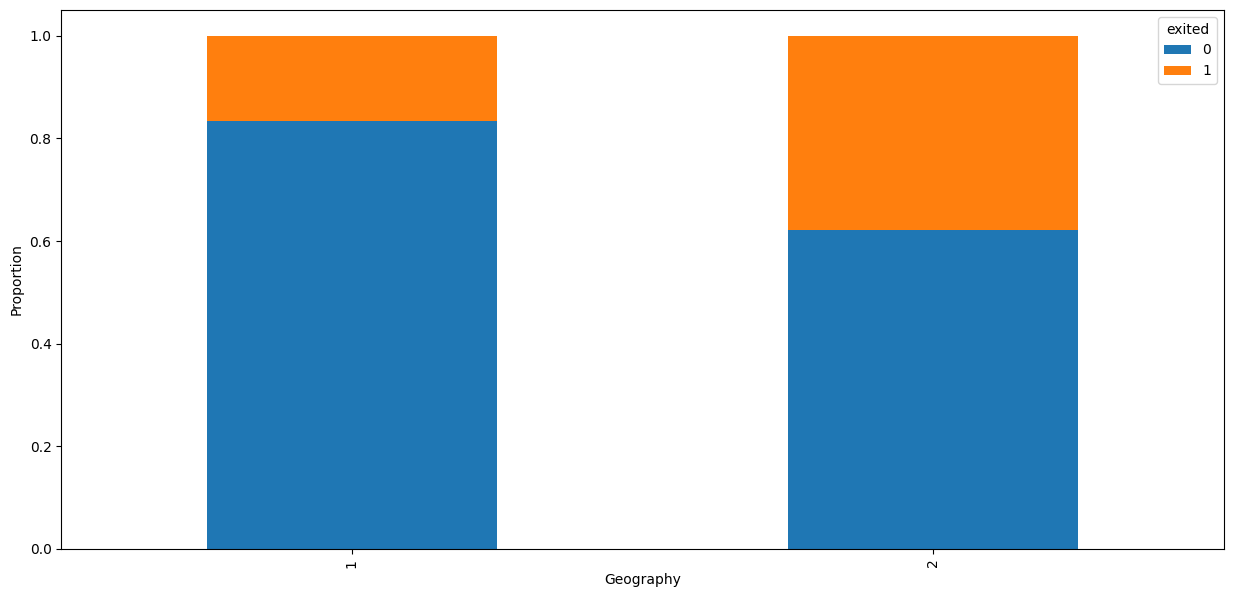

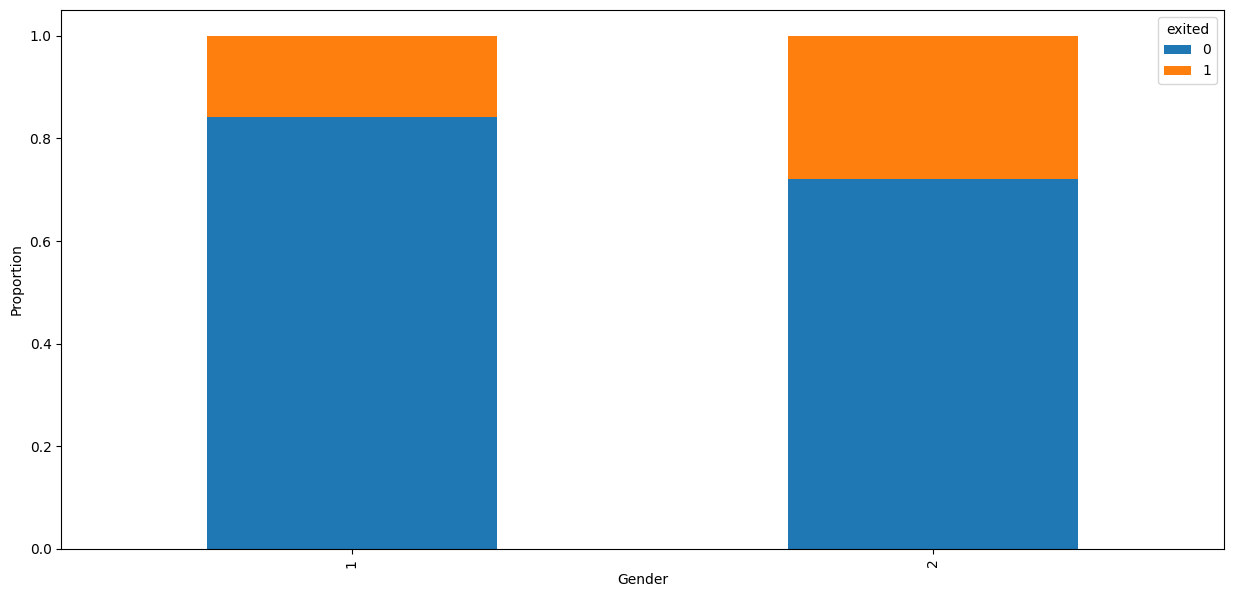

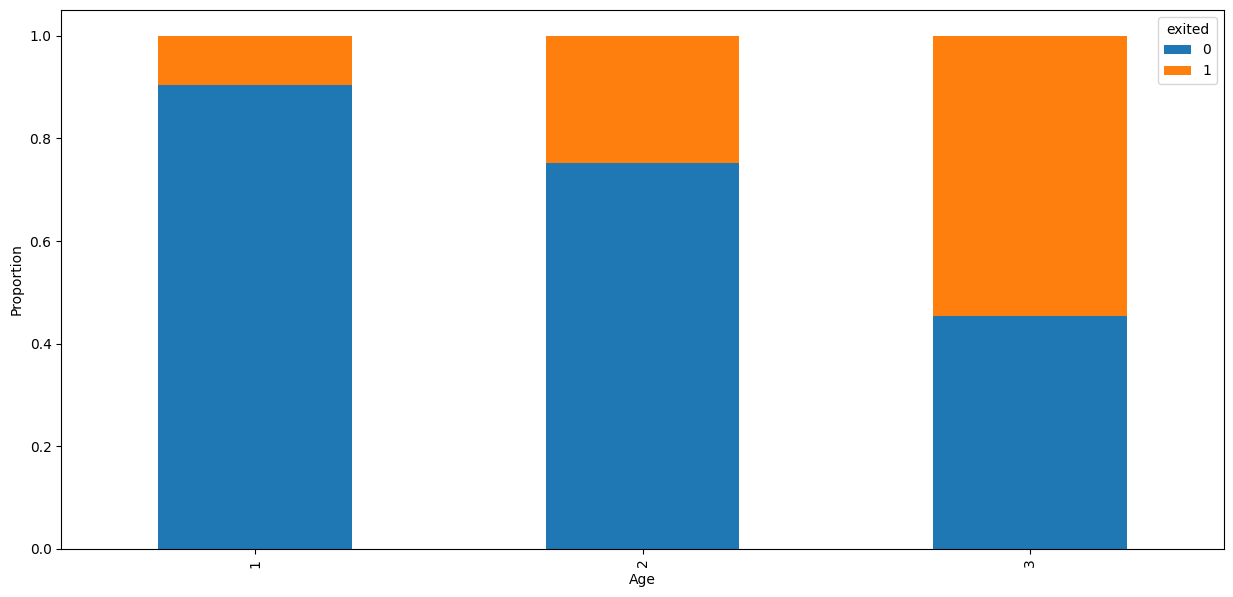

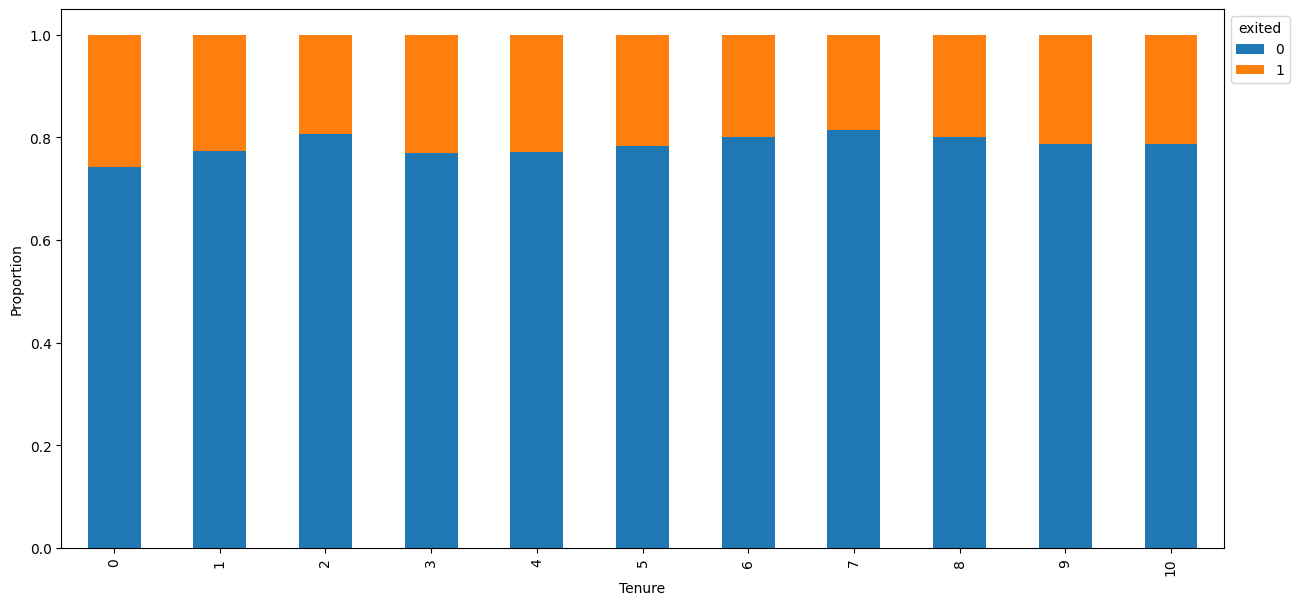

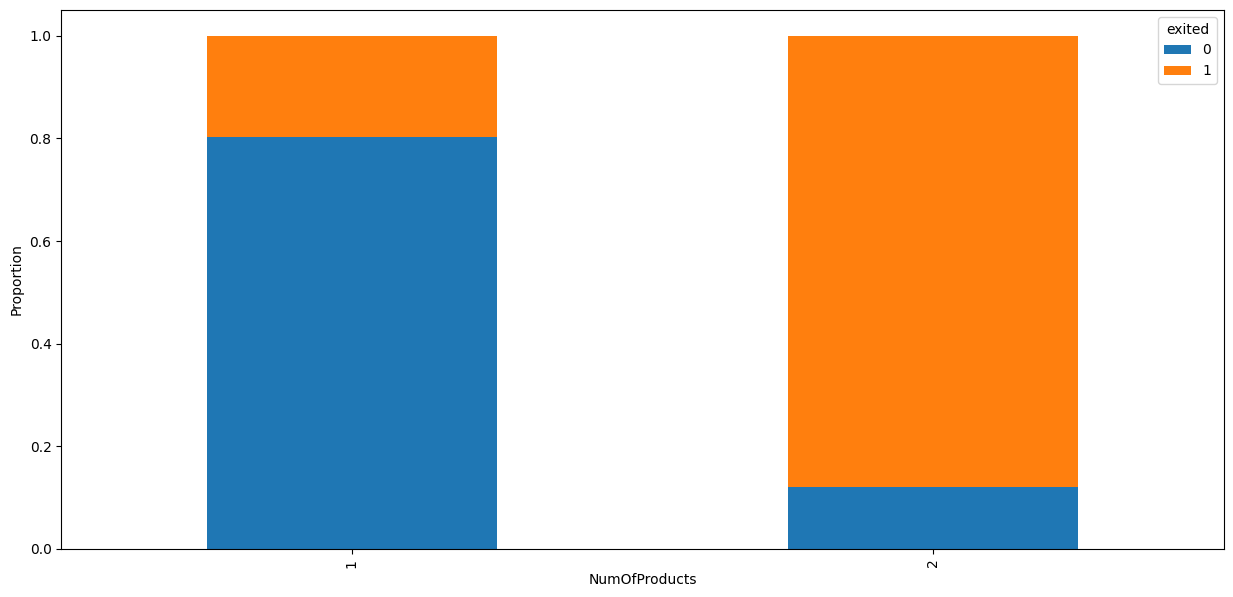

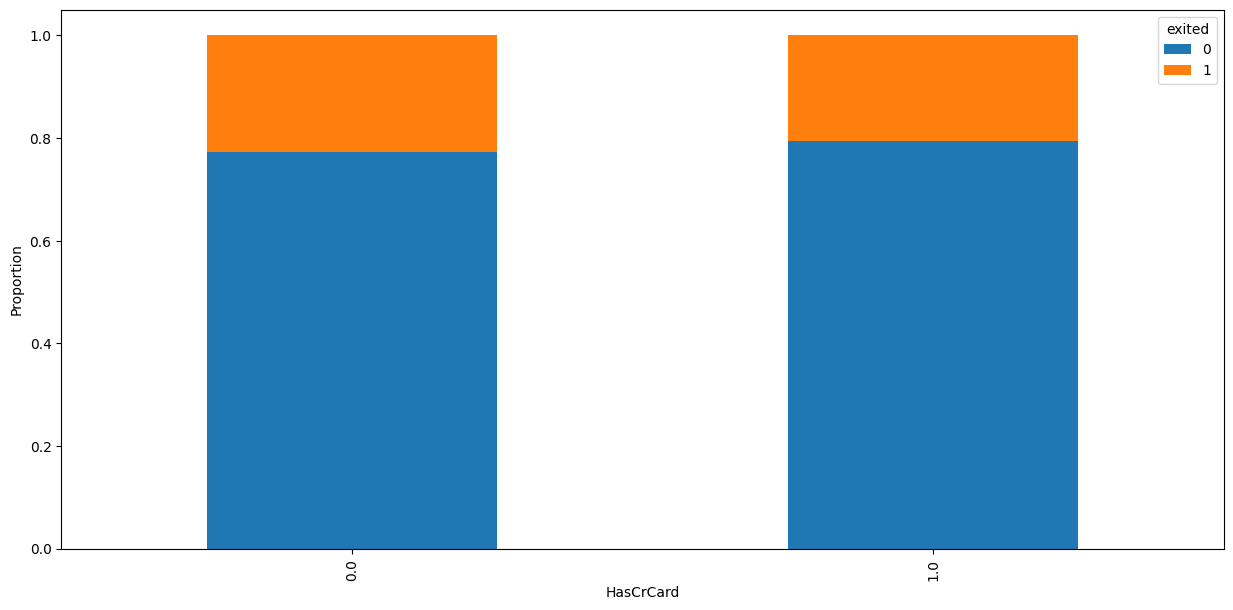

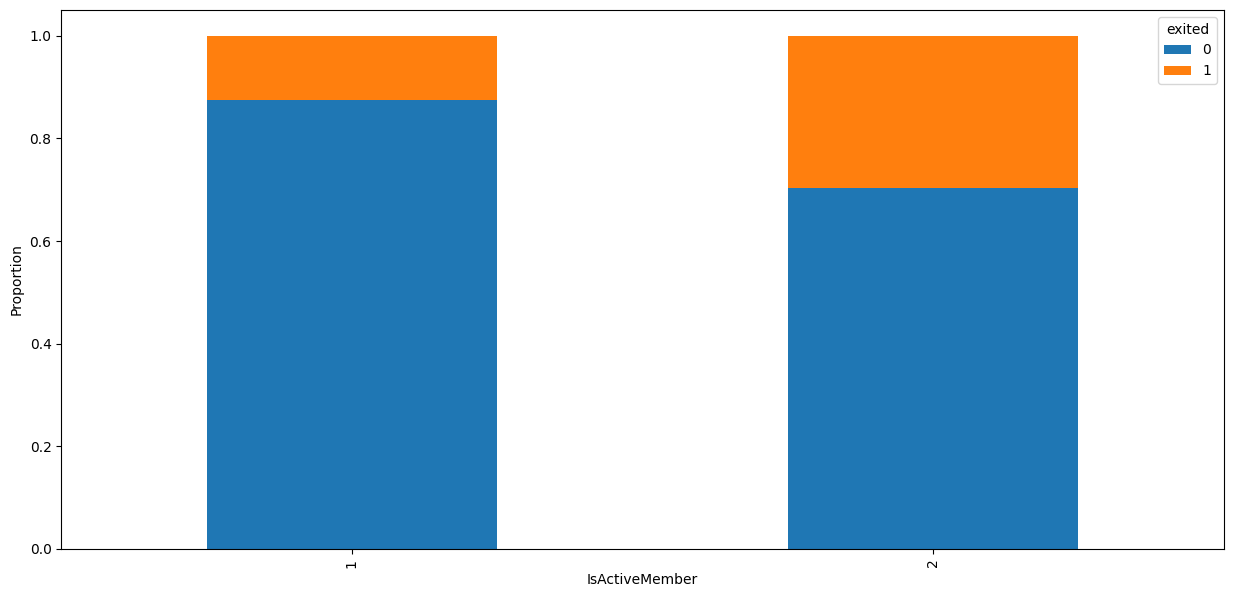

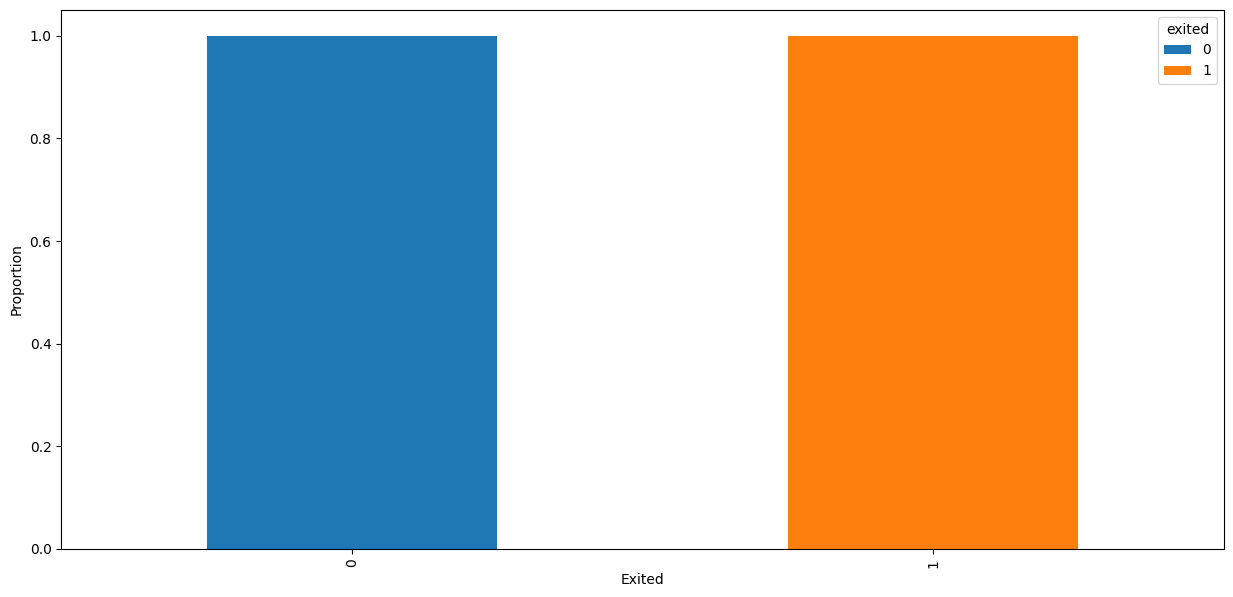

In [274]:
def visualize(string1):
    col=string1
    ct= X_train[col].value_counts(dropna=False).sort_index()
    grouped_data = X_train.groupby([string1, "Exited"]).size().unstack(fill_value=0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(15, 7))
    proportions.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel(string1)
    plt.ylabel('Proportion')
    plt.legend(title="exited", bbox_to_anchor=(1, 1))
    plt.show()

for i in X_train_cols:
    if(len(X_train[i].unique())<100):
        visualize(i)

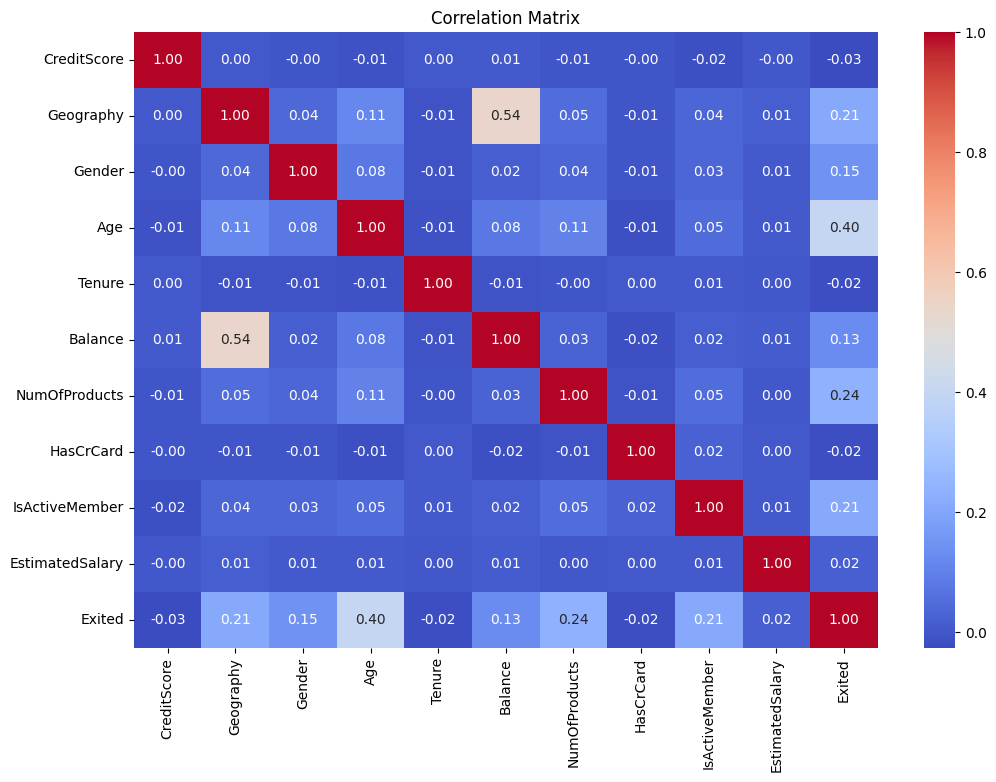

In [275]:
data_subset = X_train[X_train_cols]

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [276]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 149380 to 121958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      132027 non-null  int64  
 1   Geography        132027 non-null  int64  
 2   Gender           132027 non-null  int64  
 3   Age              132027 non-null  int64  
 4   Tenure           132027 non-null  int64  
 5   Balance          132027 non-null  float64
 6   NumOfProducts    132027 non-null  int64  
 7   HasCrCard        132027 non-null  float64
 8   IsActiveMember   132027 non-null  int64  
 9   EstimatedSalary  132027 non-null  float64
 10  Exited           132027 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 12.1 MB


In [277]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, chi2

## **crating A pipeline**

In [278]:
X_train["NumOfProducts"].unique()


array([1, 2], dtype=int64)

In [279]:
#sex_OHE
trf1=ColumnTransformer([
    ('scaler',MinMaxScaler(),slice(0,11))
],remainder='passthrough')

In [280]:
trf2=SelectKBest(score_func=chi2, k=7)

In [281]:
pipe=make_pipeline(trf1,trf2)
pipe.fit(X_train,y_train)

TypeError: '<' not supported between instances of 'str' and 'float'